In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-stock-data-2025/MSFT_1986-03-13_2025-02-04.csv


# **Table of Contents**
-----------------------------   
1. **Data Import**   
2. **Data Visulization**     
3. **Modeling**
--------------------

# **Import**

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**
------------------------

In [74]:
df = pd.read_csv('/kaggle/input/microsoft-stock-data-2025/MSFT_1986-03-13_2025-02-04.csv',parse_dates=['Date'], index_col='Date')

### **Data Description**
----------------------
* **Date** : date   
* **Ppen** : The price at market open.   
* **High** : The highest price for that day.   
* **Low**  : The lowest price for that day.   
* **Close**: The price at market close, adjusted for splits.   
* **Adj_close** :The closing price after adjustments for all applicable splits and dividend distributions. Data is adjusted using appropriate split and dividend multipliers, adhering to Center for Research in Security Prices (CRSP) standards.
* **Volume** :	The number of shares traded on that day.
---------------------------

## **Summary**

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9800 entries, 1986-03-13 to 2025-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9800 non-null   float64
 1   High       9800 non-null   float64
 2   Low        9800 non-null   float64
 3   Close      9800 non-null   float64
 4   Adj Close  9800 non-null   float64
 5   Volume     9800 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 535.9 KB


In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,9800.0,6.317373e+01,9.868275e+01,8.854200e-02,5.898438e+00,2.743625e+01,4.759781e+01,4.670000e+02
High,9800.0,6.381249e+01,9.957507e+01,9.201400e-02,5.976563e+00,2.777000e+01,4.814500e+01,4.683500e+02
Low,9800.0,6.251382e+01,9.772592e+01,8.854200e-02,5.794922e+00,2.720000e+01,4.706250e+01,4.644600e+02
Close,9800.0,6.318716e+01,9.869788e+01,9.027800e-02,5.880860e+00,2.749000e+01,4.759250e+01,4.675600e+02
Adj Close,9800.0,5.745168e+01,9.871477e+01,5.555367e-02,3.618860e+00,1.926671e+01,4.006600e+01,4.657864e+02
Volume,9800.0,5.630897e+07,3.812127e+07,2.304000e+06,3.141062e+07,4.946235e+07,7.027870e+07,1.031789e+09


## **Missing Value & Duplicate Value Check**

In [77]:
pd.DataFrame(df.isna().sum().reset_index(name='Na'))

,index,Na
0,Open,0
1,High,0
2,Low,0
3,Close,0
4,Adj Close,0
5,Volume,0


In [78]:
df.duplicated().sum()

0

## **Data Check**

In [79]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059827,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.061963,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063032,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061429,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060361,47894400


In [80]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2025-01-28,434.600006,448.380005,431.380005,447.200012,447.200012,23491700
2025-01-29,446.690002,446.880005,440.399994,442.329987,442.329987,23581400
2025-01-30,418.769989,422.859985,413.160004,414.989990,414.989990,54586300
2025-01-31,418.980011,420.690002,414.910004,415.059998,415.059998,34223400
2025-02-03,411.600006,415.410004,408.660004,410.920013,410.920013,25580600


# **2. Data Visulization**
-----------------

## **Value Volatility Comparison**

In [81]:
num_cols = df.select_dtypes(include = {'int64', 'float64'}).columns

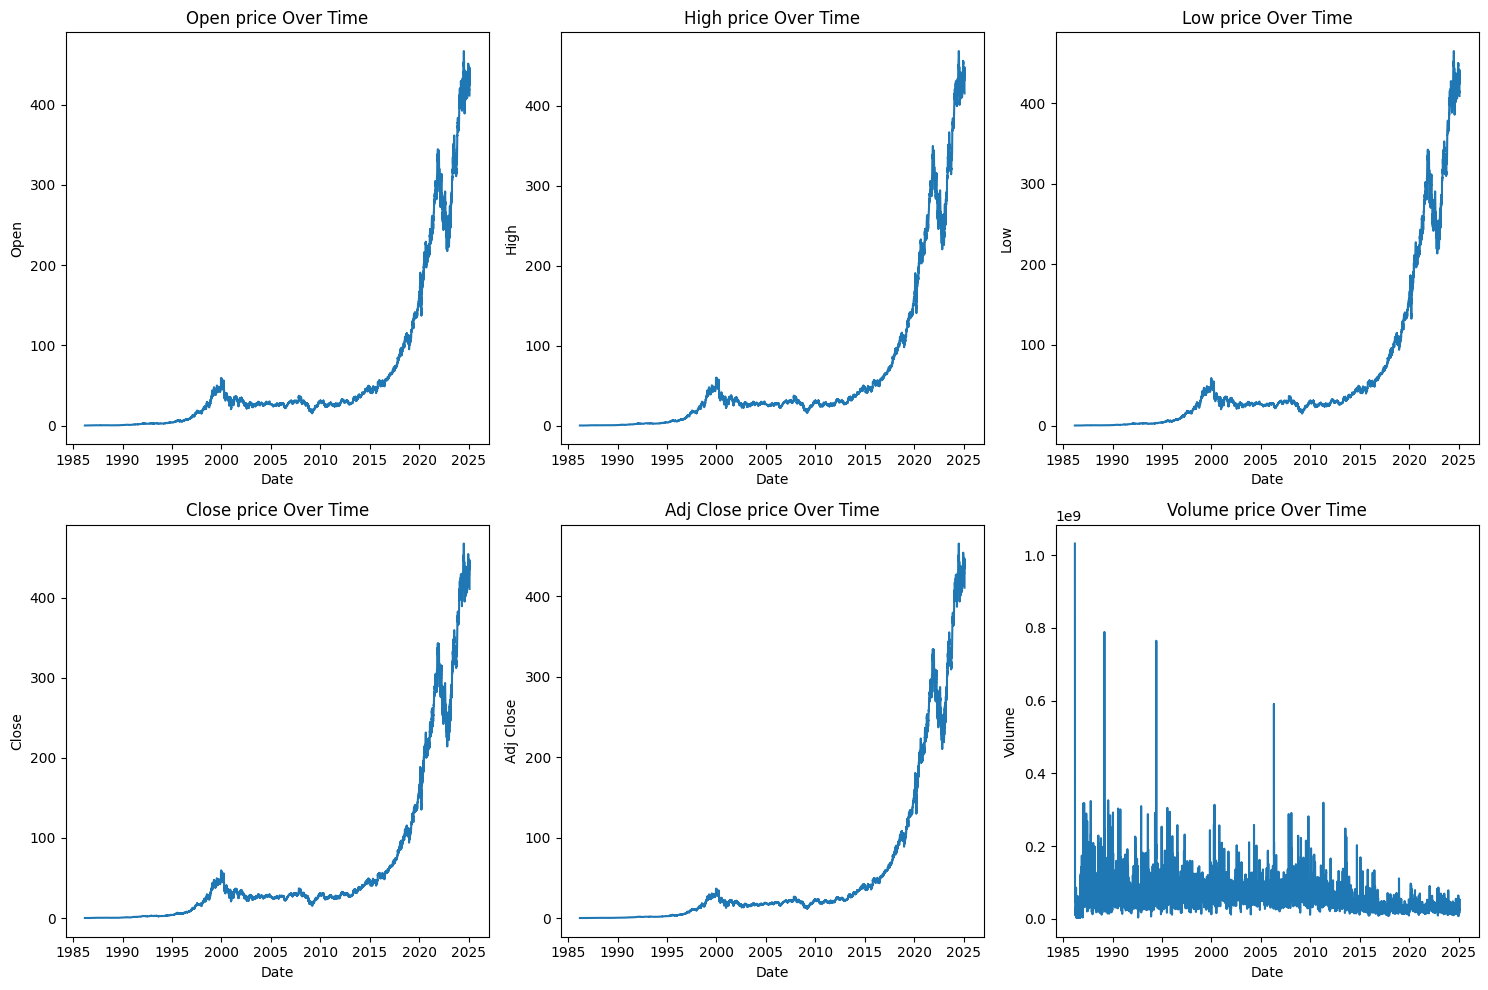

In [82]:
f, ax = plt.subplots(2,3, figsize=(15, 10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.lineplot(data = df, x= df.index, y = cols, ax = ax[index])
    ax[index].set_title(f'{cols} price Over Time')
   
plt.tight_layout()
plt.show()  

* ### **You can compare the relative changes of indicators over time.**
* ### **This helps identify price fluctuations, trends, and potential market sentiment.**
----------------------

## **Moving Arrange**

In [83]:
df2 = df.copy()

In [84]:
df2['MA10'] = df2['Close'].rolling(window=10).mean()  
df2['MA60'] = df2['Close'].rolling(window=60).mean()  
df2['MA180'] = df2['Close'].rolling(window=180).mean() 

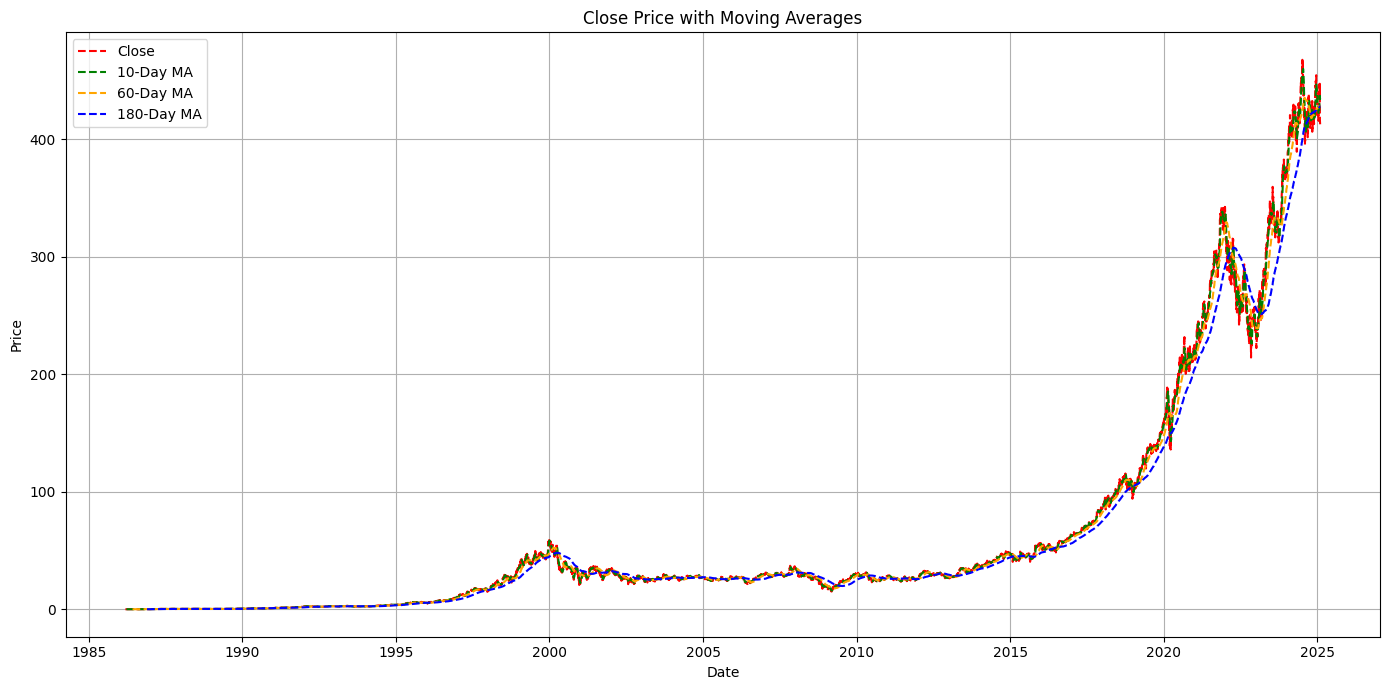

In [86]:
plt.figure(figsize=(14, 7))

plt.plot(df2.index, df2['Close'], label='Close', color='red', linestyle='--') 
plt.plot(df2.index, df2['MA10'], label='10-Day MA', color='green', linestyle='--')  
plt.plot(df2.index, df2['MA60'], label='60-Day MA', color='orange', linestyle='--')  
plt.plot(df2.index, df2['MA180'], label='180-Day MA', color='blue', linestyle='--')  

plt.title('Close Price with Moving Averages')  
plt.xlabel('Date')  
plt.ylabel('Price')  
plt.legend()  

plt.grid(True)
plt.tight_layout()
plt.show()

### **Analyze price trends and see how moving averages over different periods interact with real prices.**

-----------

# **3. Modeling**

## **Import**

In [87]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from IPython.display import Image

## **Data Preprocessing**
--------------------
### 1. **Feature Selection**
Choosing the relevant data (e.g., 'Close' price).

### 2. **Scaling/Normalization**
Adjusting the data range to make it easier for the model to process and learn.

### 3. **Sequence Creation**
Splitting the data into sequences that can be used to predict future values (a crucial step for time-series prediction).

### 4. **Conversion to Arrays**
Transforming the data into a format (e.g., numpy arrays) suitable for input into machine learning models.

----------------

In [88]:
# Feature Selection

df_close = df['Close'].values.reshape(-1, 1)

In [89]:
#Scaling/Normalization (MinMax Scale)

scaler = MinMaxScaler(feature_range=(0, 1))
df_close_scale = scaler.fit_transform(df_close)

In [90]:
# Sequence Creation
sequence_length = 30 
X, y = [], []

for i in range(sequence_length, len(df_close_scale)):
    X.append(df_close_scale[i-sequence_length:i])  
    y.append(df_close_scale[i])  

#Conversion to Arrays
X, y = np.array(X), np.array(y)

In [92]:
# Train Test Split
train_size = int(len(X) * 0.8)  

X_train, X_test = X[:train_size], X[train_size:]  
y_train, y_test = y[:train_size], y[train_size:]  

dates = df.index[sequence_length:]
train_dates = dates[:train_size]
test_dates = dates[train_size:]

Training data period: 1986-04-25 00:00:00 to 2017-04-26 00:00:00
Testing data period: 2017-04-27 00:00:00 to 2025-02-03 00:00:00


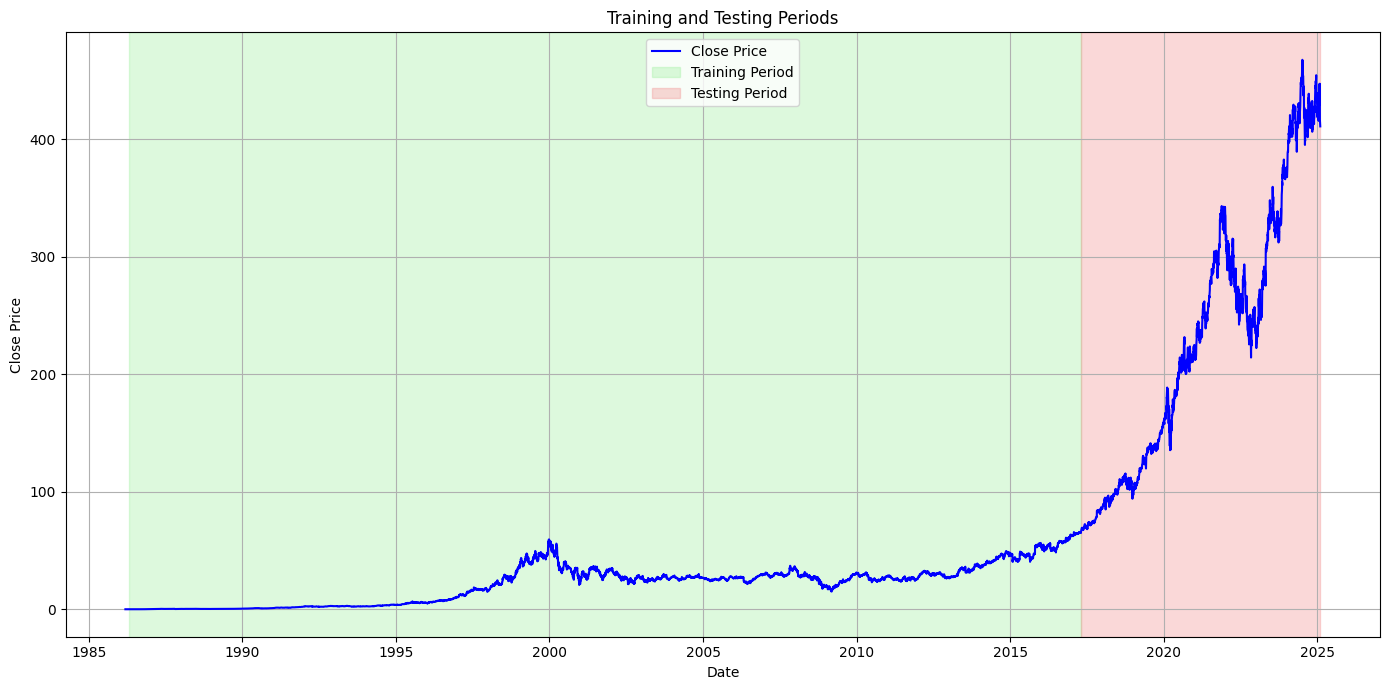

In [93]:
# Extraction Index
dates = df.index[sequence_length:] 

train_dates = dates[:train_size]
test_dates = dates[train_size:]

# Check Period
print("Training data period: {} to {}".format(train_dates[0], train_dates[-1]))
print("Testing data period: {} to {}".format(test_dates[0], test_dates[-1]))

# Check Plot 
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')

plt.axvspan(train_dates[0], train_dates[-1], color='lightgreen', alpha=0.3, label='Training Period')
plt.axvspan(test_dates[0], test_dates[-1], color='lightcoral', alpha=0.3, label='Testing Period')

plt.title('Training and Testing Periods')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **LSTM Model**
---------

In [94]:
model = Sequential()

model.add(Bidirectional(LSTM(units=64, return_sequences=True, 
                              kernel_regularizer=l2(0.001), 
                              input_shape=(X.shape[1], 1))))
model.add(Dropout(0.5)) 

model.add(Bidirectional(LSTM(units=64, return_sequences=True, 
                              kernel_regularizer=l2(0.001))))
model.add(Dropout(0.5))  


model.add(LSTM(units=64, return_sequences=True, 
               kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))  

model.add(LSTM(units=32, return_sequences=False, 
               kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))  

model.add(Dense(units=32, activation='relu'))  
model.add(Dropout(0.5)) 

# Output layer
model.add(Dense(units=1))  

# Adjust Adam optimizer parameters
adam_optimizer = Adam(learning_rate=0.00001,  
                      beta_1=0.9,          
                      beta_2=0.999,       
                      epsilon=1e-07)       

# Compile the model using the custom Adam optimizer
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')


# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',patience=3, restore_best_weights=True)

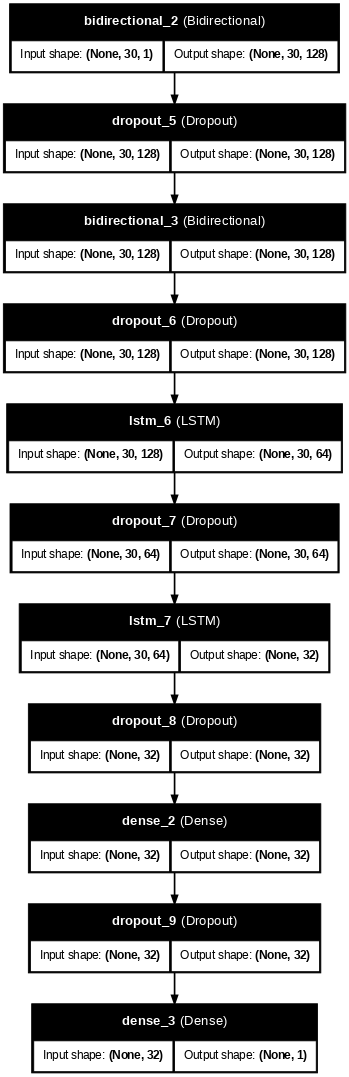

In [95]:
# Manually build the model
model.build(input_shape=(None, X.shape[1], 1))  

# Save the model architecture to a file
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True, dpi=60)

# Display the model architecture image
Image('model_structure.png')

In [96]:
history = model.fit(X, y, epochs=10, batch_size=4, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/10
2199/2199 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - loss: 0.5504 - val_loss: 0.4808
Epoch 2/10
2199/2199 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - loss: 0.3472 - val_loss: 0.2807
Epoch 3/10
2199/2199 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - loss: 0.2101 - val_loss: 0.1657
Epoch 4/10
2199/2199 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - loss: 0.1201 - val_loss: 0.1034
Epoch 5/10
2199/2199 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - loss: 0.0661 - val_loss: 0.0677
Epoch 6/10
2199/2199 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - loss: 0.0371 - val_loss: 0.0443
Epoch 7/10
2199/2199 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - loss: 0.0239 - val_loss: 0.0418
Epoch 8/10
2199/2199 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - loss: 0.0173 - val_loss: 0.0440
Epoch 9/10
2199/2199 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - loss: 0.0141 - val_loss: 0.0230
Epoch 10/10
2199/2199 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - loss: 0.0115 - val_loss: 0.0575


## **Training Loss**

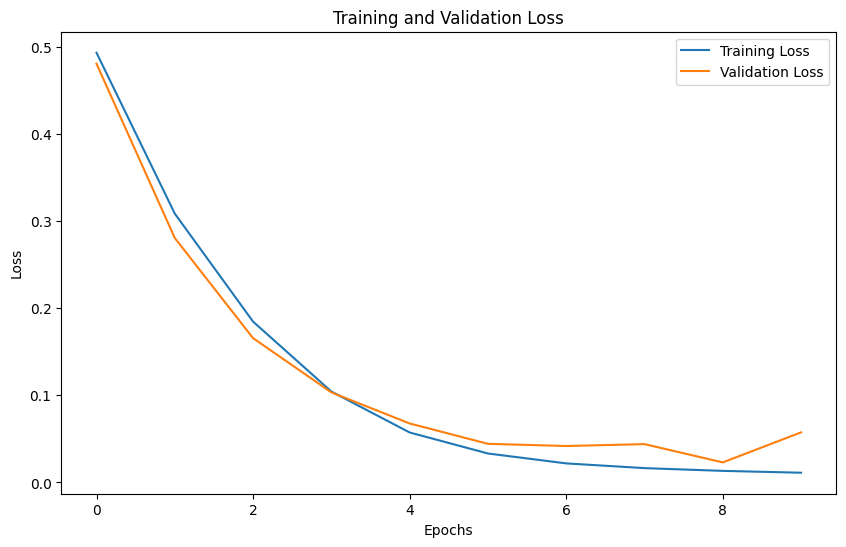

In [97]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


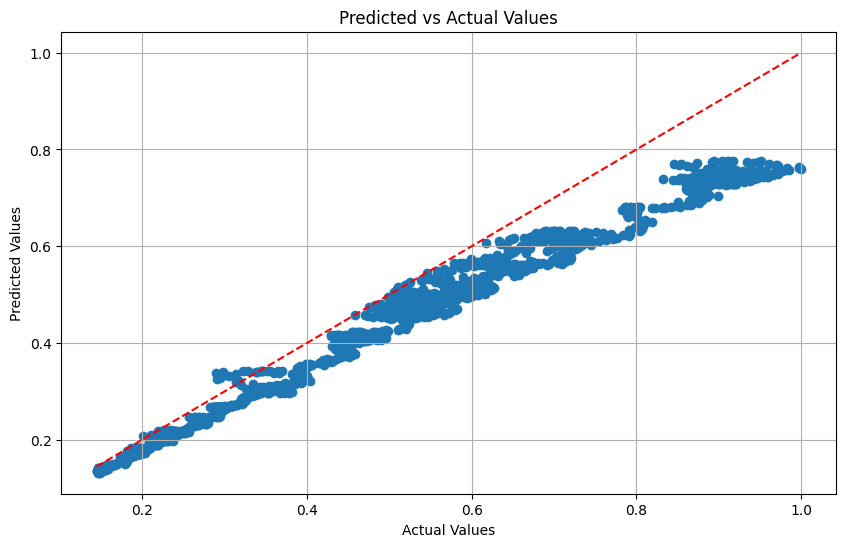

In [98]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


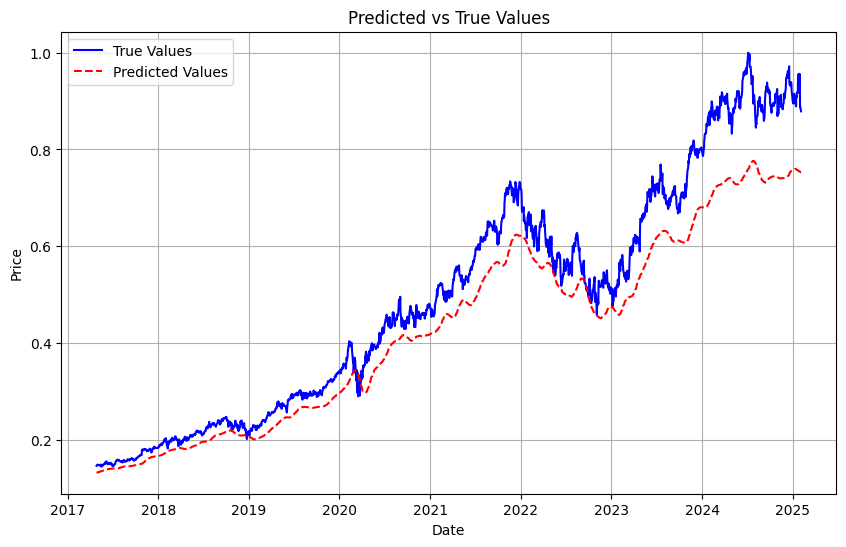

In [99]:
predictions = model.predict(X_test)

y_pred = scaler.inverse_transform(y_pred)
y_actual = scaler.inverse_transform(y_test)

plt.figure(figsize=(10, 6))

plt.plot(test_dates, y_test, label='True Values', color='blue')
plt.plot(test_dates, predictions, label='Predicted Values', color='red', linestyle='--')

plt.legend()
plt.title('Predicted vs True Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## **Prediction**

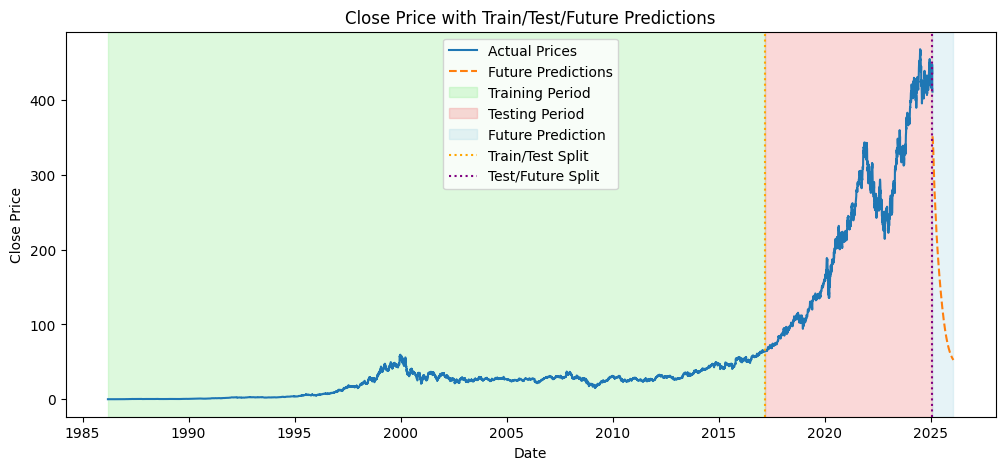

In [104]:
future_predictions = []
last_sequence = df_close_scale[-sequence_length:]  

for _ in range(360):  
    
    input_data = last_sequence.reshape(1, sequence_length, 1)
    
    #prediction
    predicted_price = model.predict(input_data, verbose=0)
    
    # Store the predicted price
    future_predictions.append(predicted_price[0, 0])
    
    # Update the input sequence
    last_sequence = np.append(last_sequence[1:], predicted_price, axis=0)

# Inverse scale the predicted values to the original price range
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

plt.figure(figsize=(12, 5))

# Plot actual data (train + test)
plt.plot(df.index, df_close, label='Actual Prices')  

# Plot future predictions
future_dates = pd.date_range(df.index[-1], periods=361, freq='D')[1:]
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')

# Label train, test, and future periods
train_end_date = df.index[train_size-1]  
test_start_date = df.index[train_size]   
test_end_date = df.index[-1]           

# Add shaded areas (background color) for train, test, and future periods
plt.axvspan(df.index[0], train_end_date, color='lightgreen', alpha=0.3, label='Training Period')
plt.axvspan(test_start_date, test_end_date, color='lightcoral', alpha=0.3, label='Testing Period')
plt.axvspan(test_end_date, future_dates[-1], color='lightblue', alpha=0.3, label='Future Prediction')

# Add vertical lines to separate the periods
plt.axvline(x = train_end_date, color='orange', linestyle=':', label='Train/Test Split')
plt.axvline(x = test_end_date, color='purple', linestyle=':', label='Test/Future Split')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.title('Close Price with Train/Test/Future Predictions')
plt.show()

**Please leave your advice in the comments. Thank you**